# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Import the dataset

In [2]:
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Inspect the dataset

In [3]:
#To the the number of rows and columns in the dataset
df.shape

(38765, 3)

In [4]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [5]:
#To check the data type, names of columns and the columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Data Preparation

In [6]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

C:\Users\USER\AppData\Local\Temp\ipykernel_13000\1991277086.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
...,...,...,...
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice


In [7]:
# To check the number of missing values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
#To check for duplicates in the dataset
df.duplicated().sum()

759

In [9]:
# To remove the duplicates in the dataset
df.drop_duplicates(keep = False, inplace = True)

In [10]:
#To ascertain that we no longer have duplicates
df.duplicated().sum()

0

# Exploratory data analysis

In [11]:
#To know the most frequently bought items
df['itemDescription'].value_counts()

itemDescription
whole milk               2232
other vegetables         1760
rolls/buns               1580
soda                     1394
yogurt                   1238
                         ... 
toilet cleaner              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

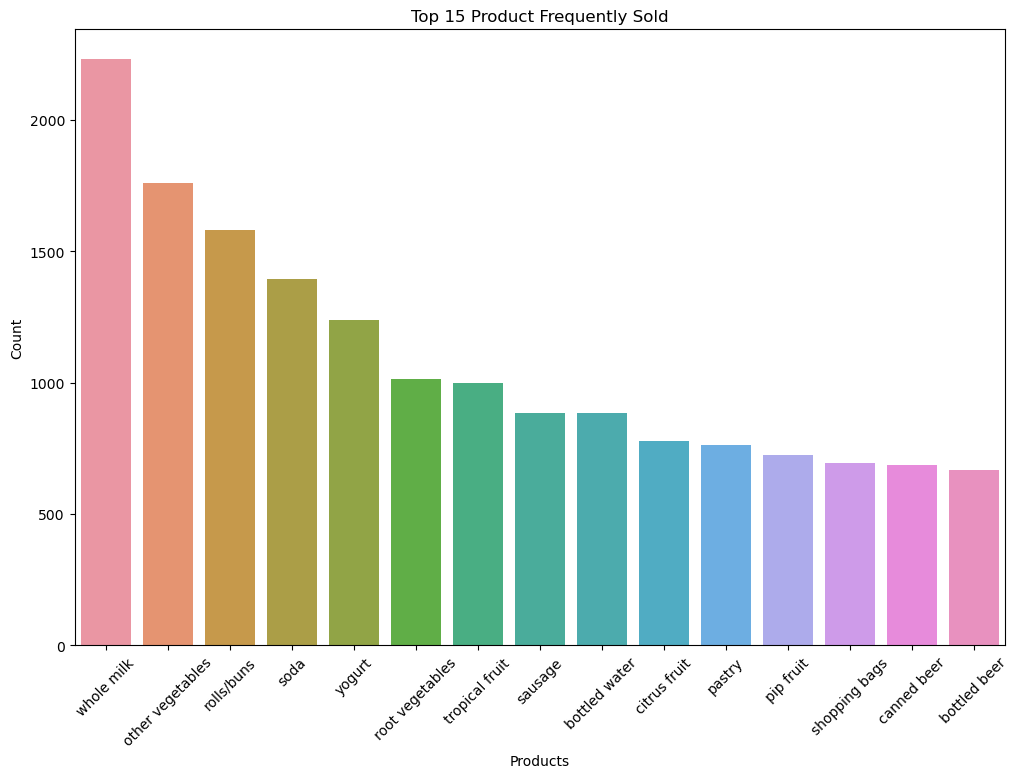

In [12]:
#To show the 15 most frequently sold items in a graphical presentation
plt.figure(figsize=(12,8))
x=df['itemDescription'].value_counts().sort_values(ascending = False)[:15]
frequentlySold = sns.barplot(x=x.index, y=x.values)
plt.title('Top 15 Product Frequently Sold')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [13]:
# To create a new DataFrame that shows, for each unique combination of member and date, a concatenated string of item descriptions associated with that combination.
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(','.join).reset_index()
df

,Member_number,Date,itemDescription
0,1000,2014-06-24,"whole milk,pastry,salty snack"
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt"
2,1000,2015-05-27,"soda,pickled vegetables"
3,1000,2015-07-24,"canned beer,misc. beverages"
4,1000,2015-11-25,"sausage,hygiene articles"
...,...,...,...
14752,4999,2015-05-16,"butter milk,whipped/sour cream"
14753,4999,2015-12-26,"bottled water,herbs"
14754,5000,2014-03-09,"fruit/vegetable juice,onions"
14755,5000,2014-11-16,"bottled beer,other vegetables"


In [14]:
#This is to create a numpy array of the item description
transactions=df[['itemDescription']].values  


#This is a list comprehension to convert a list of strings into list of lists, where each list contains different set of item descriptipn
transactions=[(''.join(i).split(",")) for i in transactions] 

In [15]:
#to get the frequent itemsets
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

#To put the frequent itemsets in a table format
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)
df_onehot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Apply the apriori algorithm 
frequent_itemsets = apriori(df_onehot, min_support=0.001, use_colnames=True)

#To create another column with the lengths of the itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.004066,(Instant food products),1
1,0.021481,(UHT-milk),1
2,0.001491,(abrasive cleaner),1
3,0.001965,(artif. sweetener),1
4,0.008132,(baking powder),1
...,...,...,...
717,0.001016,"(rolls/buns, other vegetables, soda)",3
718,0.001084,"(soda, whole milk, other vegetables)",3
719,0.001016,"(rolls/buns, sausage, whole milk)",3
720,0.001084,"(rolls/buns, whole milk, yogurt)",3


In [17]:
#To generate association rules from frequent itemsets using the Apriori algorithm 
#The rules are filtered based on a minimum threshold of 0.02.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021481,0.059836,0.001084,0.050473,0.843525,-0.000201,0.990139,-0.159362
1,(UHT-milk),(other vegetables),0.021481,0.119265,0.002033,0.094637,0.793501,-0.000529,0.972797,-0.210080
2,(UHT-milk),(rolls/buns),0.021481,0.107068,0.001762,0.082019,0.766046,-0.000538,0.972713,-0.237868
3,(UHT-milk),(sausage),0.021481,0.059836,0.001152,0.053628,0.896246,-0.000133,0.993440,-0.105791
4,(UHT-milk),(soda),0.021481,0.094464,0.001220,0.056782,0.601103,-0.000809,0.960050,-0.404116
...,...,...,...,...,...,...,...,...,...,...
951,"(whole milk, yogurt)",(rolls/buns),0.010368,0.107068,0.001084,0.104575,0.976719,-0.000026,0.997216,-0.023519
952,"(sausage, whole milk)",(yogurt),0.008403,0.083892,0.001288,0.153226,1.826457,0.000583,1.081879,0.456326
953,"(sausage, yogurt)",(whole milk),0.005353,0.151250,0.001288,0.240506,1.590122,0.000478,1.117520,0.373115
954,"(whole milk, yogurt)",(sausage),0.010368,0.059836,0.001288,0.124183,2.075389,0.000667,1.073471,0.523591


In [18]:
#filtering from the rule
rules[(rules['lift'] >= 1) & (rules['confidence']>=0.001)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(tropical fruit),(UHT-milk),0.067561,0.021481,0.001491,0.022066,1.027227,0.000040,1.000598,0.028426
6,(UHT-milk),(tropical fruit),0.021481,0.067561,0.001491,0.069401,1.027227,0.000040,1.001977,0.027087
12,(beef),(brown bread),0.033882,0.037609,0.001355,0.040000,1.063568,0.000081,1.002490,0.061864
13,(brown bread),(beef),0.037609,0.033882,0.001355,0.036036,1.063568,0.000081,1.002234,0.062104
18,(beef),(curd),0.033882,0.033476,0.001288,0.038000,1.135154,0.000153,1.004703,0.123238
...,...,...,...,...,...,...,...,...,...,...
948,"(sausage, whole milk)",(rolls/buns),0.008403,0.107068,0.001016,0.120968,1.129823,0.000117,1.015813,0.115880
952,"(sausage, whole milk)",(yogurt),0.008403,0.083892,0.001288,0.153226,1.826457,0.000583,1.081879,0.456326
953,"(sausage, yogurt)",(whole milk),0.005353,0.151250,0.001288,0.240506,1.590122,0.000478,1.117520,0.373115
954,"(whole milk, yogurt)",(sausage),0.010368,0.059836,0.001288,0.124183,2.075389,0.000667,1.073471,0.523591
